In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv


In [2]:
df = pd.read_csv("/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
df.shape

(99, 9)

In [4]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


<Axes: xlabel='Fertilizer Name', ylabel='count'>

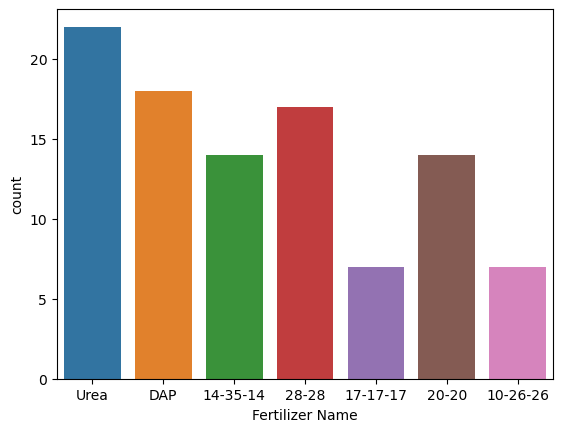

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="Fertilizer Name")

In [7]:
df["Soil Type"].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [8]:
df["Crop Type"].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [9]:
soil = pd.get_dummies(df["Soil Type"])
crop = pd.get_dummies(df["Crop Type"])

In [10]:
df = pd.concat([df, soil, crop], axis=1)
df = df.drop(["Soil Type", "Crop Type"], axis=1)
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Black,Clayey,Loamy,...,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,26,52,38,37,0,0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,DAP,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,14-35-14,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,28-28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,Urea,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
X = df.drop("Fertilizer Name", axis=1)
y = df["Fertilizer Name"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = rf_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.95

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.75      1.00      0.86         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



<Axes: >

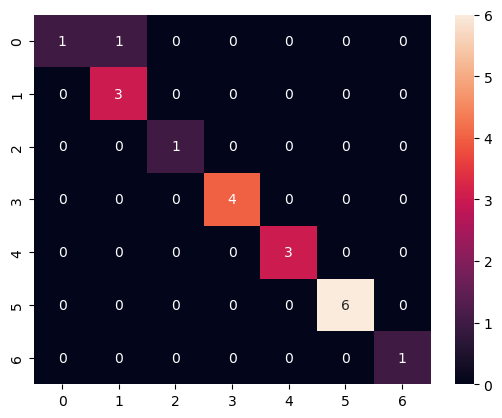

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")